In [35]:
import DataLoader as loader
import hddm
import HDDMmodelMaker as ddm
import pandas as pd
import time
import matplotlib.pyplot as plt

In [20]:
dl = loader.DataLoader()
exp, users = dl.loadSessionsData()

In [21]:
#Load by HDDM package
data = hddm.load_csv('./output/experimentData.csv')
data = hddm.utils.flip_errors(data)
data.head()

,Unnamed: 0,round,response,rt,user,session,subj_id
0,0,1,1,6.332,usuario3,s3t1330,usuario3s3t1330
1,1,2,1,12.817,usuario3,s3t1330,usuario3s3t1330
2,2,3,1,6.144,usuario3,s3t1330,usuario3s3t1330
3,3,4,0,-4.218,usuario3,s3t1330,usuario3s3t1330
4,4,5,0,-5.595,usuario3,s3t1330,usuario3s3t1330


In [22]:
data["session"].unique()

array(['s3t1330', 's1t1030', 's4t1500', 's2t1200'], dtype=object)

In [23]:
#data segmented by treatment 

sess1 = data.loc[data.session == 's1t1030']
sess2 = data.loc[data.session == 's2t1200']
sess3 = data.loc[data.session == 's3t1330']
sess4 = data.loc[data.session == 's4t1500']


In [24]:
max(sess4["round"])

50

In [43]:
modeler = ddm.HDDMmodelMaker()
rounds1 = pd.DataFrame()
rounds2 = pd.DataFrame()
rounds3 = pd.DataFrame()
rounds4 = pd.DataFrame()

#Five by five rounds
st=time.time()
rounds = range(1,50)

for r in rounds:
    print("Model: 1, round %d, time: %f" % (r, time.time() - st))
    m_1 = modeler.fit_model(sess1.loc[(sess1["round"] >= r) & (sess1["round"] <= (r+5))], 5000, 200)
    print("Model: 2, round %d, time: %f" % (r, time.time() - st))
    m_2 = modeler.fit_model(sess2.loc[(sess2["round"] >= r) & (sess2["round"] <= (r+5))], 5000, 200)
    print("Model: 3, round %d, time: %f" % (r, time.time() - st))
    m_3 = modeler.fit_model(sess3.loc[(sess3["round"] >= r) & (sess3["round"] <= (r+5))], 5000, 200)
    print("Model: 4, round %d, time: %f" % (r, time.time() - st))
    m_4 = modeler.fit_model(sess4.loc[(sess4["round"] >= r) & (sess4["round"] <= (r+5))], 5000, 200)

    df_1 = modeler.get_stats(m_1)
    df_2 = modeler.get_stats(m_2)
    df_3 = modeler.get_stats(m_3)
    df_4 = modeler.get_stats(m_4)
    df_1["round"] = r
    df_2["round"] = r
    df_3["round"] = r
    df_4["round"] = r
    if r == 0:
        rounds1 = df_1
        rounds2 = df_2
        rounds3 = df_3
        rounds4 = df_4
    else:
        rounds1 = rounds1.append(df_1, ignore_index=True)
        rounds2 = rounds2.append(df_2, ignore_index=True)
        rounds3 = rounds3.append(df_3, ignore_index=True)
        rounds4 = rounds4.append(df_4, ignore_index=True)
    #print("Rounds: %d" % r)
    if (r*5) % 10 == 0:
        print("Rounds: %d" % r)
        rounds1.to_csv("./output/rounds/sess1.csv")
        rounds2.to_csv("./output/rounds/sess2.csv")
        rounds3.to_csv("./output/rounds/sess3.csv")
        rounds4.to_csv("./output/rounds/sess4.csv")
rounds1.to_csv("./output/rounds/sess1.csv")
rounds2.to_csv("./output/rounds/sess2.csv")
rounds3.to_csv("./output/rounds/sess3.csv")
rounds4.to_csv("./output/rounds/sess4.csv")

Model: 1, round 1, time: 0.000721
 [-----------------100%-----------------] 5000 of 5000 complete in 12.6 secModel: 2, round 1, time: 12.639309
 [-----------------100%-----------------] 5000 of 5000 complete in 12.6 secModel: 3, round 1, time: 25.307999
 [-----------------100%-----------------] 5000 of 5000 complete in 12.0 secModel: 4, round 1, time: 37.351477
 [-----------------100%-----------------] 5000 of 5000 complete in 13.1 secModel: 1, round 2, time: 50.915622
 [-----------------100%-----------------] 5000 of 5000 complete in 11.8 secModel: 2, round 2, time: 62.852960
 [-----------------100%-----------------] 5000 of 5000 complete in 12.6 secModel: 3, round 2, time: 75.515120
 [-----------------100%-----------------] 5000 of 5000 complete in 11.7 secModel: 4, round 2, time: 87.259709
 [-----------------100%-----------------] 5000 of 5000 complete in 13.2 secRounds: 2
Model: 1, round 3, time: 100.943647
 [-----------------100%-----------------] 5000 of 5000 complete in 12.3 sec

 [-----------------100%-----------------] 5000 of 5000 complete in 7.3 secModel: 2, round 37, time: 1571.551256
 [-----------------100%-----------------] 5000 of 5000 complete in 10.1 secModel: 3, round 37, time: 1581.751534
 [-----------------100%-----------------] 5000 of 5000 complete in 9.2 secModel: 4, round 37, time: 1591.030907
 [-----------------100%-----------------] 5000 of 5000 complete in 12.5 secModel: 1, round 38, time: 1604.432879
 [-----------------100%-----------------] 5000 of 5000 complete in 8.0 secModel: 2, round 38, time: 1612.507610
 [-----------------100%-----------------] 5000 of 5000 complete in 11.5 secModel: 3, round 38, time: 1624.037986
 [-----------------100%-----------------] 5000 of 5000 complete in 8.4 secModel: 4, round 38, time: 1632.527274
 [-----------------100%-----------------] 5000 of 5000 complete in 9.3 secRounds: 38
Model: 1, round 39, time: 1642.375805
 [-----------------100%-----------------] 5000 of 5000 complete in 8.3 secModel: 2, round 

In [36]:
def plot_rounds(data_1, data_2, data_3, data_4, param, title):
    param_1 = data_1.loc[(data_1.parameter == param), ["mean", "round"]]
    param_2 = data_2.loc[(data_2.parameter == param) , ["mean", "round"]]
    param_3 = data_3.loc[(data_3.parameter == param) , ["mean", "round"]]
    param_4 = data_4.loc[(data_4.parameter == param) , ["mean", "round"]]
    plt.figure(figsize = (10,10))
    plt.plot(param_1["round"],param_1["mean"], "-o", label = "1030")
    plt.plot(param_2["round"], param_2["mean"],"-o", label = "1200")
    plt.plot(param_3["round"], param_3["mean"], "-o", label = "1330")
    plt.plot(param_4["round"], param_4["mean"], "-o", label = "1500")
    plt.xlabel("Rounds")
    plt.ylabel(param)
    plt.legend(loc = "best")
    plt.title(title)

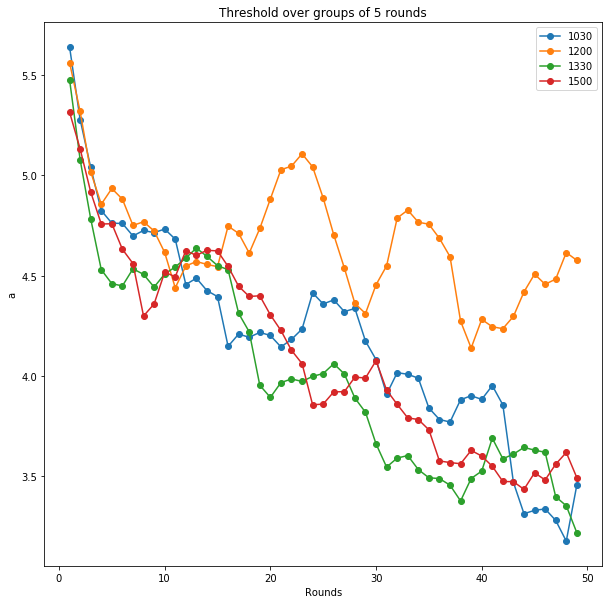

In [44]:
plot_rounds(rounds1, rounds2, rounds3, rounds4, "a", "Threshold over groups of 5 rounds")

In [1]:
plot_rounds(rounds1, rounds2, rounds3, rounds4, "v", "Drift over groups of 5 rounds")

NameError: name 'plot_rounds' is not defined

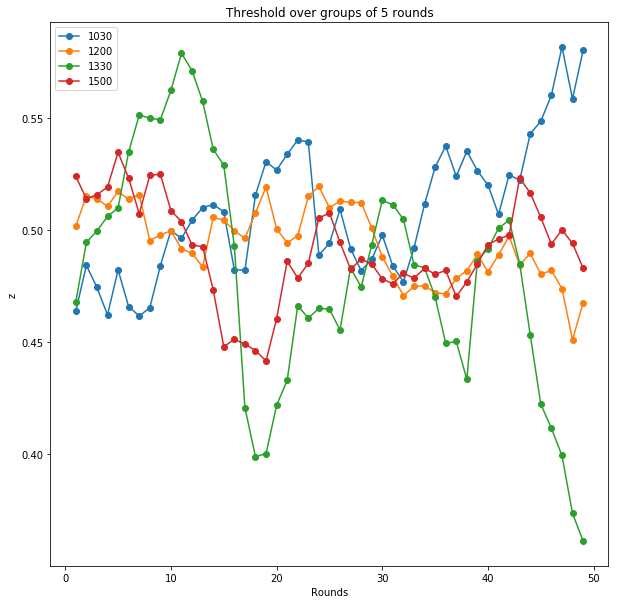

In [46]:
plot_rounds(rounds1, rounds2, rounds3, rounds4, "z", "Threshold over groups of 5 rounds")